In [43]:
# Load the H2O library and start up the H2O cluter locally on your machine
import h2o

# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,3 mins 34 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.9
H2O cluster version age:,1 month and 1 day
H2O cluster name:,H2O_from_python_shlok_ctgjlp
H2O cluster total nodes:,1
H2O cluster free memory:,7.040 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [44]:
data = h2o.import_file("noshow_revised.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
data.shape

(71954, 18)

In [4]:
data.head()

C1,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,ScheduledMonth,AppointmentMonth,Time
5,9.59851e+13,5.62677e+06,F,2016-04-27 08:36:51,2016-04-29 00:00:00,76,REPÃšBLICA,0,1,0,0,0,0,No,4,4,1
6,7.33688e+14,5.63028e+06,F,2016-04-27 15:05:12,2016-04-29 00:00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,4,4,1
7,3.44983e+12,5.63058e+06,F,2016-04-27 15:39:58,2016-04-29 00:00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,4,4,1
9,7.81246e+13,5.62912e+06,F,2016-04-27 12:48:25,2016-04-29 00:00:00,19,CONQUISTA,0,0,0,0,0,0,No,4,4,1
10,7.34536e+14,5.63021e+06,F,2016-04-27 14:58:11,2016-04-29 00:00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,4,4,1
11,7.54295e+12,5.62016e+06,M,2016-04-26 08:44:12,2016-04-29 00:00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,4,4,2
12,5.66655e+14,5.63472e+06,F,2016-04-28 11:33:51,2016-04-29 00:00:00,22,NOVA PALESTINA,1,0,0,0,0,0,No,4,4,0
13,9.11395e+14,5.63625e+06,M,2016-04-28 14:52:07,2016-04-29 00:00:00,28,NOVA PALESTINA,0,0,0,0,0,0,No,4,4,0
14,9.98847e+13,5.63395e+06,F,2016-04-28 10:06:24,2016-04-29 00:00:00,54,NOVA PALESTINA,0,0,0,0,0,0,No,4,4,0
15,9.99484e+10,5.62021e+06,F,2016-04-26 08:47:27,2016-04-29 00:00:00,15,NOVA PALESTINA,0,0,0,0,0,1,No,4,4,2


In [45]:
data = data.drop([ 'Neighborhood','Gender','PatientID','AppointmentID'], axis=1)


In [6]:
data.describe()

Rows:71954
Cols:14




,C1,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,ScheduledMonth,AppointmentMonth,Time
type,int,time,time,int,int,int,int,int,int,int,enum,int,int,int
mins,5.0,1447139636000.0,1461888000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,1.0,4.0,0.0
mean,54586.14990132581,1462312324593.4636,1463622151530.1438,38.497428912916575,0.09271201045112155,0.20889735108541568,0.07472829863523918,0.025321733329627262,0.01998499041054007,0.4931067070628457,,4.617561219668126,5.210717958695833,14.642257553436918
maxs,110526.0,1465326237000.0,1465344000000.0,100.0,1.0,1.0,1.0,1.0,4.0,1.0,,12.0,6.0,178.0
sigma,32339.741038617798,1725341803.053832,1054137366.9352598,22.91789870571808,0.2900304511891708,0.40652373185525215,0.262954256437638,0.15710151546067544,0.1539469365549716,0.499955954402364,,0.7397613188917292,0.47641254661559734,16.494482893312956
zeros,0,0,0,2131,65283,56923,66577,70132,70650,36473,,0,0,5213
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,5.0,2016-04-27 08:36:51,2016-04-29 00:00:00,76.0,0.0,1.0,0.0,0.0,0.0,0.0,No,4.0,4.0,1.0
1,6.0,2016-04-27 15:05:12,2016-04-29 00:00:00,23.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,4.0,4.0,1.0
2,7.0,2016-04-27 15:39:58,2016-04-29 00:00:00,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,4.0,4.0,1.0


In [8]:
data.columns

['C1',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_received',
 'NoShow',
 'ScheduledMonth',
 'AppointmentMonth',
 'Time']

In [46]:
# Define features (or predictors) manually
features =['C1',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_received',
 'ScheduledMonth',
 'AppointmentMonth',
 'Time']

In [47]:
# Split the H2O data frame into training/test sets
# so we can evaluate out-of-bag performance
data_split = data.split_frame(ratios = [0.9], seed = 1234)

data_train = data_split[0] # using 90% for training
data_test = data_split[1]  # using the rest 10% for out-of-bag evaluation

In [11]:
data_train.shape

(64586, 14)

In [12]:
data_test.shape

(7368, 14)

In [13]:
data_train

C1,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,ScheduledMonth,AppointmentMonth,Time
5,2016-04-27 08:36:51,2016-04-29 00:00:00,76,0,1,0,0,0,0,No,4,4,1
6,2016-04-27 15:05:12,2016-04-29 00:00:00,23,0,0,0,0,0,0,Yes,4,4,1
7,2016-04-27 15:39:58,2016-04-29 00:00:00,39,0,0,0,0,0,0,Yes,4,4,1
10,2016-04-27 14:58:11,2016-04-29 00:00:00,30,0,0,0,0,0,0,No,4,4,1
11,2016-04-26 08:44:12,2016-04-29 00:00:00,29,0,0,0,0,0,1,Yes,4,4,2
12,2016-04-28 11:33:51,2016-04-29 00:00:00,22,1,0,0,0,0,0,No,4,4,0
13,2016-04-28 14:52:07,2016-04-29 00:00:00,28,0,0,0,0,0,0,No,4,4,0
14,2016-04-28 10:06:24,2016-04-29 00:00:00,54,0,0,0,0,0,0,No,4,4,0
16,2016-04-28 08:51:47,2016-04-29 00:00:00,50,0,0,0,0,0,0,No,4,4,0
17,2016-04-28 09:28:57,2016-04-29 00:00:00,40,1,0,0,0,0,0,Yes,4,4,0


# Generalized Linear Model

In [14]:
#Setting Parameters for grid search
hyper_parameters = { 'alpha': [0.01,0.1,0.3,0.5,0.7,0.9], 
                     'lambda': [1e-4,1e-5,1e-6,1e-7,1e-8] }

search_criteria = { 'strategy': "RandomDiscrete", 'seed': 42,
                    'stopping_metric': "AUTO", 
                    'stopping_tolerance': 0.001,
                    'stopping_rounds': 2 }

In [15]:
# Build a Generalized Linear Model (GLM) with default settings

# Import the function for GLM
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch


glm_gridSearch = H2OGridSearch(H2OGeneralizedLinearEstimator(model_id = 'glm_hyperParam', family='binomial', nfolds=5),
                               hyper_parameters, 
                               grid_id="glm_gridSearch", 
                               search_criteria=search_criteria)

In [16]:
glm_girdSearch_fit = glm_gridSearch.train(x = features,
                                         y = 'NoShow',
                                         training_frame = data_train)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [17]:
glm_gridPerformance = glm_gridSearch.get_grid(sort_by='auc', decreasing=True)

In [18]:
print(glm_gridPerformance)

      alpha    lambda               model_ids                 auc
0    [0.01]  [1.0E-8]  glm_gridSearch_model_1  0.5866910867104446
1     [0.9]  [1.0E-7]  glm_gridSearch_model_3  0.5865992332183763
2     [0.3]  [1.0E-7]  glm_gridSearch_model_0  0.5864677491214542
3     [0.1]  [1.0E-7]  glm_gridSearch_model_4  0.5863745339365533
4    [0.01]  [1.0E-4]  glm_gridSearch_model_2   0.585262013276652



# Distributed Random Forest

In [31]:
# DRF hyperparameters
drf_params = {'mtries': [3, 6, 9] }

In [43]:
# Build a Distributed Random Forest (DRF) model with default settings

# Import the function for DRF
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [44]:

drf_gridSearch = H2OGridSearch(H2ORandomForestEstimator(seed = 1234, model_id = 'drf_hyperParam'), 
                                   hyper_params = drf_params,
                                   search_criteria = {'strategy': "Cartesian"}, 
                                   grid_id = "drf_gridSearch" )

In [45]:
drf_gridSearch.train(x = features, y = 'NoShow', training_frame = data_train)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [46]:
drf_gridPerformance = drf_gridSearch.get_grid(sort_by='auc', decreasing=True)

In [47]:
drf_gridPerformance

    mtries               model_ids                 auc
0        3  drf_gridSearch_model_0  0.6160396799287857
1        6  drf_gridSearch_model_1  0.6129486612736232
2        9  drf_gridSearch_model_2  0.6092266791385752


# Gradient Boosting Machines

In [19]:
# Import H2O Grid Search:
from h2o.grid.grid_search import H2OGridSearch

# Import H2O GBM:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [20]:
# GBM hyperparameters
gbm_params = {'learn_rate': [0.01, 0.1], 
                'max_depth': [3, 5, 9],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.2, 0.5, 1.0]}

In [21]:
gbm_gridSearch = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params)
gbm_gridSearch.train(x=features, y='NoShow', 
                training_frame=data_train, 
                ntrees=100,
                seed=1)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [22]:
gbm_gridPerf = gbm_gridSearch.get_grid(sort_by='auc', decreasing=True)

In [23]:
gbm_gridPerf

     col_sample_rate learn_rate max_depth sample_rate           model_ids  \
0                1.0        0.1         9         0.8  gbm_grid1_model_17   
1                1.0        0.1         9         1.0  gbm_grid1_model_35   
2                0.5        0.1         9         0.8  gbm_grid1_model_16   
3                0.5        0.1         9         1.0  gbm_grid1_model_34   
4                0.2        0.1         9         0.8  gbm_grid1_model_15   
5                0.2        0.1         9         1.0  gbm_grid1_model_33   
6                1.0       0.01         9         0.8  gbm_grid1_model_14   
7                0.5       0.01         9         1.0  gbm_grid1_model_31   
8                0.5       0.01         9         0.8  gbm_grid1_model_13   
9                1.0       0.01         9         1.0  gbm_grid1_model_32   
10               1.0        0.1         5         1.0  gbm_grid1_model_29   
11               1.0        0.1         5         0.8  gbm_grid1_model_11   

# Deep Learning

In [48]:
# Build a Deep Learning (Deep Neural Networks, DNN) model with default settings

# Import the function for DNN
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [49]:
# DL hyperparameters
activation_opt = ["Rectifier", "RectifierWithDropout", "Maxout", "MaxoutWithDropout"]
l1_opt = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
l2_opt = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
dl_params = {'activation': activation_opt, 'l1': l1_opt, 'l2': l2_opt}

In [50]:
# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_runtime_secs': 120, 'seed':1}

In [51]:
dl_gridSearch = H2OGridSearch(model=H2ODeepLearningEstimator,
                        grid_id='dl_grid',
                        hyper_params=dl_params,
                        search_criteria=search_criteria)

In [54]:
dl_gridSearch.train(x=features, y='NoShow',
              training_frame=data_train,              
              hidden=[10,10],          
              search_criteria=search_criteria)


deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [55]:
dl_gridPerf = dl_gridSearch.get_grid(sort_by='auc', decreasing=True)

In [56]:
dl_gridPerf

                 activation      l1      l2         model_ids  \
0                 Rectifier  1.0E-4   0.001  dl_grid_model_36   
1                 Rectifier  1.0E-5  1.0E-4  dl_grid_model_49   
2      RectifierWithDropout  1.0E-4   0.001  dl_grid_model_17   
3                 Rectifier     0.0  1.0E-5  dl_grid_model_24   
4         MaxoutWithDropout  1.0E-4  1.0E-4  dl_grid_model_19   
5      RectifierWithDropout     0.0   0.001  dl_grid_model_12   
6         MaxoutWithDropout    0.01     0.0  dl_grid_model_10   
7         MaxoutWithDropout   0.001  1.0E-4   dl_grid_model_9   
8                    Maxout   0.001   0.001  dl_grid_model_40   
9                    Maxout  1.0E-5  1.0E-4  dl_grid_model_18   
10                   Maxout   0.001     0.0  dl_grid_model_51   
11     RectifierWithDropout  1.0E-5     0.0  dl_grid_model_28   
12        MaxoutWithDropout     0.0   0.001  dl_grid_model_63   
13                   Maxout  1.0E-5   0.001  dl_grid_model_35   
14     RectifierWithDropo

## AutoML

In [57]:
from h2o.automl import H2OAutoML

Run AutoML, stopping after 60 seconds. The max_runtime_secs argument provides a way to limit the AutoML run by time. When using a time-limited stopping criterion, the number of models train will vary between runs. If different hardware is used or even if the same machine is used but the available compute resources on that machine are not the same between runs, then AutoML may be able to train more models on one run vs another.

The test frame is passed explicitly to the leaderboard_frame argument here, which means that instead of using cross-validated metrics, we use test set metrics for generating the leaderboard.

In [58]:
aml = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "No_Show_Appointment")
aml.train(y = 'NoShow', training_frame = data_train, leaderboard_frame = data_test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [59]:
aml2 = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "No_Show")
aml2.train(y = 'NoShow', training_frame = data_train)

AutoML progress: |████████████████████████████████████████████████████████| 100%



For demonstration purposes, we will also execute a second AutoML run, this time providing the original, full dataset, df (without passing a leaderboard_frame). This is a more efficient use of our data since we can use 100% of the data for training, rather than 80% like we did above. This time our leaderboard will use cross-validated metrics.

Note: Using an explicit leaderboard_frame for scoring may be useful in some cases, which is why the option is available.

In [60]:
aml3 = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "No_Show_full_data")
aml3.train(y = 'NoShow', training_frame = data)

AutoML progress: |████████████████████████████████████████████████████████| 100%


## Leaderboard

Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the H2OAutoML.train() method for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

After viewing the "powerplant_lb_frame" AutoML project leaderboard, we compare that to the leaderboard for the "powerplant_full_data" project. We can see that the results are better when the full dataset is used for training.

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of regression, the default ranking metric is mean residual deviance. In the future, the user will be able to specify any of the H2O metrics so that different metrics can be used to generate rankings on the leaderboard.

In [61]:
aml.leaderboard.head()

model_id,auc,logloss,mean_per_class_error,rmse,mse
XRT_0_AutoML_20181027_001449,0.617464,0.582387,0.420567,0.442718,0.195999
StackedEnsemble_AllModels_0_AutoML_20181027_001449,0.61668,0.572656,0.425557,0.439285,0.192972
StackedEnsemble_BestOfFamily_0_AutoML_20181027_001449,0.61668,0.572656,0.425557,0.439285,0.192972
DRF_0_AutoML_20181027_001449,0.608298,0.591669,0.444199,0.446291,0.199176


Now we will view a snapshot of the top models. Here we should see the two Stacked Ensembles at or near the top of the leaderboard. Stacked Ensembles can almost always outperform a single model.

In [62]:
aml2.leaderboard.head()

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_0_AutoML_20181027_001930,0.615819,0.578828,0.442859,0.442483,0.195791
StackedEnsemble_AllModels_0_AutoML_20181027_001930,0.615819,0.578828,0.442859,0.442483,0.195791
XRT_0_AutoML_20181027_001930,0.612556,0.593355,0.438881,0.447093,0.199892
DRF_0_AutoML_20181027_001930,0.611978,0.601448,0.439108,0.448803,0.201424


In [63]:
aml3.leaderboard.head()

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_0_AutoML_20181027_002212,0.622261,0.577276,0.426031,0.441777,0.195167
StackedEnsemble_BestOfFamily_0_AutoML_20181027_002212,0.622261,0.577276,0.426031,0.441777,0.195167
XRT_0_AutoML_20181027_002212,0.619361,0.58794,0.429689,0.445372,0.198356
DRF_0_AutoML_20181027_002212,0.618803,0.595308,0.426192,0.447231,0.200015


## Predict Using Leader Model

If you need to generate predictions on a test set, you can make predictions on the "H2OAutoML" object directly, or on the leader model object.

In [64]:
pred = aml.predict(data_test)
pred.head()

drf prediction progress: |████████████████████████████████████████████████| 100%


predict,No,Yes
Yes,0.479529,0.520471
Yes,0.567089,0.432911
Yes,0.296455,0.703545
Yes,0.578603,0.421397
Yes,0.725293,0.274707
Yes,0.264516,0.735484
Yes,0.758894,0.241106
No,0.921032,0.0789683
No,0.933489,0.0665108
Yes,0.625793,0.374207


In [66]:
pred = aml2.predict(data_test)
pred.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,No,Yes
Yes,0.546985,0.453015
Yes,0.674445,0.325555
Yes,0.416859,0.583141
Yes,0.668154,0.331846
Yes,0.716854,0.283146
Yes,0.453882,0.546118
Yes,0.750083,0.249917
No,0.828114,0.171886
No,0.844825,0.155175
Yes,0.644928,0.355072


In [67]:
pred = aml3.predict(data_test)
pred.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,No,Yes
Yes,0.711709,0.288291
Yes,0.717523,0.282477
Yes,0.65144,0.34856
No,0.805223,0.194777
Yes,0.39945,0.60055
Yes,0.417207,0.582793
No,0.785887,0.214113
Yes,0.514757,0.485243
No,0.849499,0.150501
Yes,0.725263,0.274737


In [50]:
h2o.cluster().shutdown()

H2O session _sid_a4ef closed.


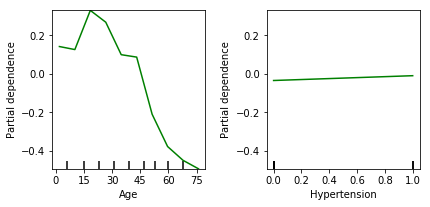

In [4]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

cols_to_use = [
 'Age',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_received',
 'ScheduledMonth',
 'AppointmentMonth',
 'Time']

def get_some_data():
   data = pd.read_csv('noshow_revised.csv')
   y = data.NoShow
   X = data[cols_to_use]
   my_imputer = Imputer()
   imputed_X = my_imputer.fit_transform(X)
   return imputed_X, y


X, y = get_some_data()
my_model = GradientBoostingClassifier()
my_model.fit(X, y)
my_plots = plot_partial_dependence(my_model,
                                  features=[0,2],
                                  X=X,
                                  feature_names=cols_to_use,
                                  grid_resolution=10)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn import cross_validation, metrics   


df = pd.read_csv('noshow_revised.csv')

df['NoShow'].replace('No', '0',inplace=True)
df['NoShow'].replace('Yes', '1',inplace=True)
df['Gender'].replace('F', '0',inplace=True)
df['Gender'].replace('M', '1',inplace=True)

X = df.drop(['NoShow','Neighborhood','ScheduledDay','AppointmentDay'],axis=1)
y = df['NoShow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [5]:
df.head()

,Unnamed: 0,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,ScheduledMonth,AppointmentMonth,Time
0,5,9.598513e+13,5626772,0,2016-04-27 08:36:51,2016-04-29 00:00:00,76,REPÚBLICA,0,1,0,0,0,0,0,4,4,1.0
1,6,7.336882e+14,5630279,0,2016-04-27 15:05:12,2016-04-29 00:00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,4,4,1.0
2,7,3.449833e+12,5630575,0,2016-04-27 15:39:58,2016-04-29 00:00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,4,4,1.0
3,9,7.812456e+13,5629123,0,2016-04-27 12:48:25,2016-04-29 00:00:00,19,CONQUISTA,0,0,0,0,0,0,0,4,4,1.0
4,10,7.345362e+14,5630213,0,2016-04-27 14:58:11,2016-04-29 00:00:00,30,NOVA PALESTINA,0,0,0,0,0,0,0,4,4,1.0


In [8]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

In [10]:
rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [19]:
imp=rf1.feature_importances_
imp
features=X.columns

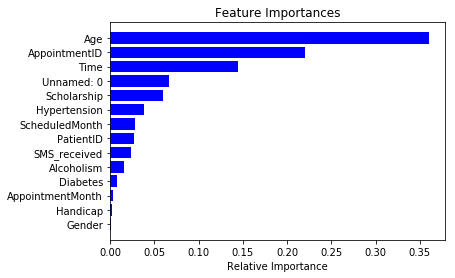

In [20]:
import matplotlib.pyplot as plt
import numpy as np
indices = np.argsort(imp)

plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [29]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
drf_default = H2ORandomForestEstimator(model_id = 'drf_default',seed =1234)

In [30]:
data_split = data.split_frame(ratios = [0.9], seed = 1234)

data_train = data_split[0] # using 90% for training
data_test = data_split[1]
drf_default.train(x= features, y= 'NoShow', training_frame= data_train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


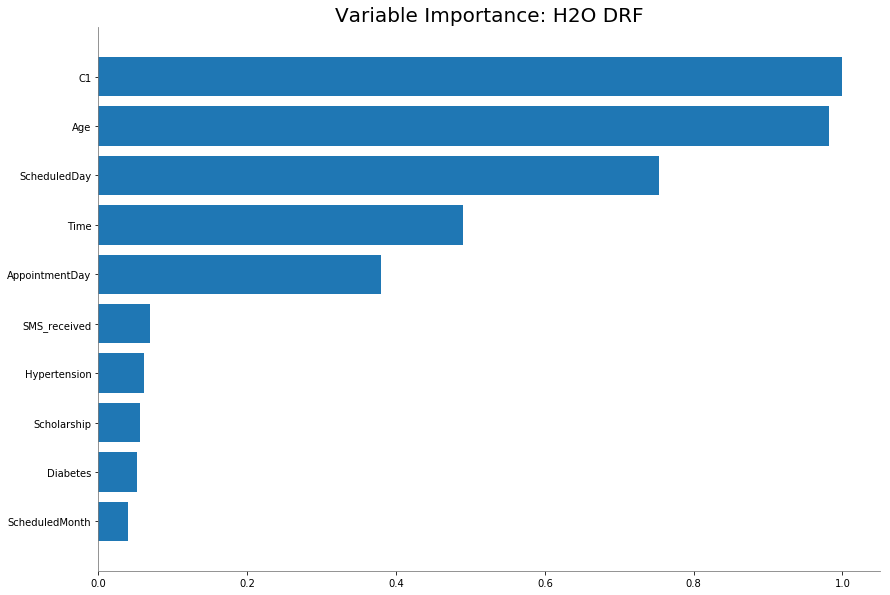

In [31]:
drf_default.varimp_plot()

In [32]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm_default = H2OGradientBoostingEstimator(model_id = 'gbm_default',seed =1234)

In [33]:
gbm_default.train(x= features, y= 'NoShow', training_frame= data_train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


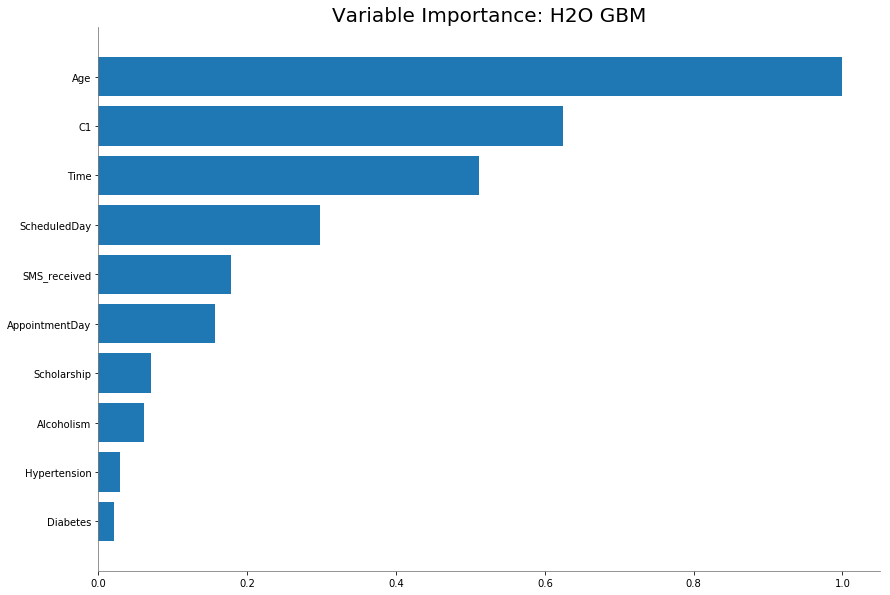

In [34]:
gbm_default.varimp_plot()

In [35]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
dnn_default = H2ODeepLearningEstimator(model_id='dnn_default', seed =1234)

In [37]:
dnn_default.train(x= features, y= 'NoShow', training_frame= data_train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


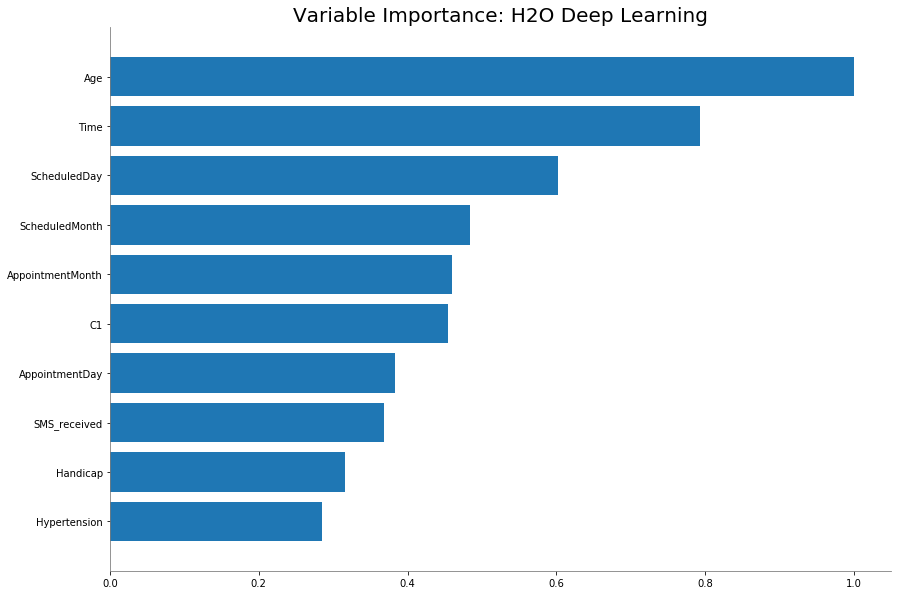

In [38]:
dnn_default.varimp_plot()

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pandas_profiling
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go
mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline
%config InlineBackend.figure_format='retina'

C:\Users\shlok\anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\shlok\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\shlok\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\shlok\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\shlok\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\shlok\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\Users\shl

In [53]:
df= pd.read_csv('noshow_revised.csv')

In [54]:
df.ScheduledDay = df.ScheduledDay.apply(np.datetime64)
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)

print(df.ScheduledDay.head())
print(df.AppointmentDay.head())


0   2016-04-27 08:36:51
1   2016-04-27 15:05:12
2   2016-04-27 15:39:58
3   2016-04-27 12:48:25
4   2016-04-27 14:58:11
Name: ScheduledDay, dtype: datetime64[ns]
0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]


In [55]:
print("Number of listed PatientID:\t%s" %df.shape[0])
print("Number of unique PatientId:\t%s" %len(df.PatientID.unique()))
print("Number of unique AppointmentID:\t%s" %len(df.AppointmentID.unique()))

Number of listed PatientID:	71954
Number of unique PatientId:	45837
Number of unique AppointmentID:	71954


In [56]:
# View range of variables / unique values
print('Age:\t%s'%sorted(df.Age.unique()))
print()
print('Gender:\t%s' %df.Gender.unique())
print()
print('Number of neighborhoods:\t%s' %df.Neighborhood.nunique())
print('Neighborhood:\t%s' %sorted(df.Neighborhood.unique()))
print()
print('Scholarship:\t%s' %df.Scholarship.unique())
print('Hypertension:\t%s' %df.Hypertension.unique())
print('Diabetes:\t%s' %df.Diabetes.unique())
print('Alchoholism:\t%s' %df.Alcoholism.unique())
print('Handicap:\t%s' %df.Handicap.unique())
print('SMS_received:\t%s' %df.SMS_received.unique())
print('NoShow:\t%s' %df.NoShow.unique())

Age:	[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100]

Gender:	['F' 'M']

Number of neighborhoods:	80
Neighborhood:	['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE'

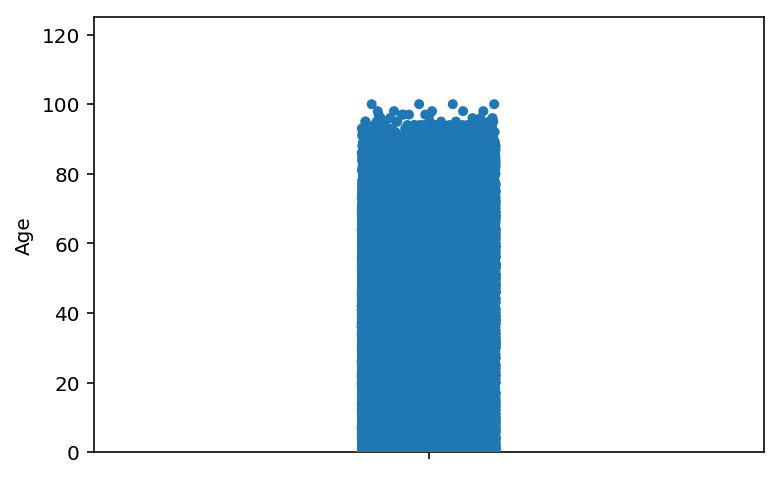

In [57]:
sns.stripplot(data = df, y = 'Age', jitter = True)
plt.ylim(0, 125)
plt.show()

In [58]:
# Drop impossible/outlier ages
df.drop(df[(df.Age < 0) | (df.Age > 100)].index, inplace = True)

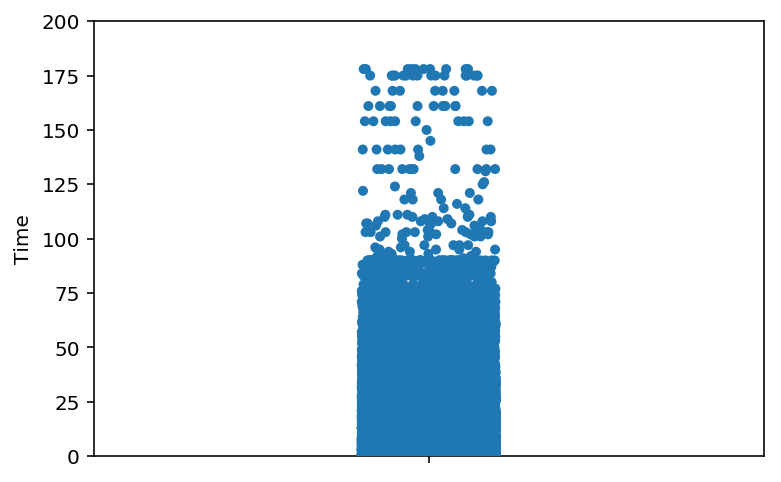

In [59]:
sns.stripplot(data = df, y = 'Time', jitter = True)
plt.ylim(0, 200)
plt.show()

Time is the number of days after the appointment is scheduled

Mean number of appointments per patient:	1.4933350786482535
Median number of appointments per patient:	1.0


<function matplotlib.pyplot.show>

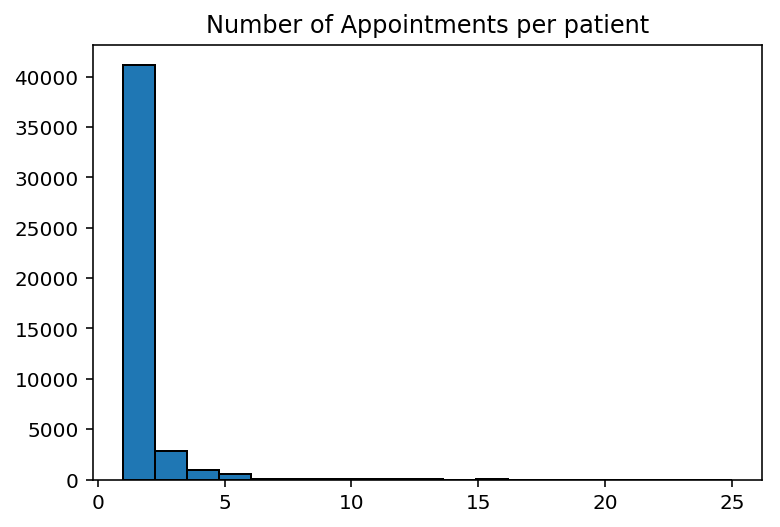

In [60]:
# Histogram of number of appointments per patient
x = df.groupby('PatientID')['AppointmentDay'].nunique()
print('Mean number of appointments per patient:\t%s' %np.mean(x))
print('Median number of appointments per patient:\t%s' %np.median(x))

plt.figure(1)
plt.hist(x, bins = x.nunique())
plt.title("Number of Appointments per patient")
plt.show

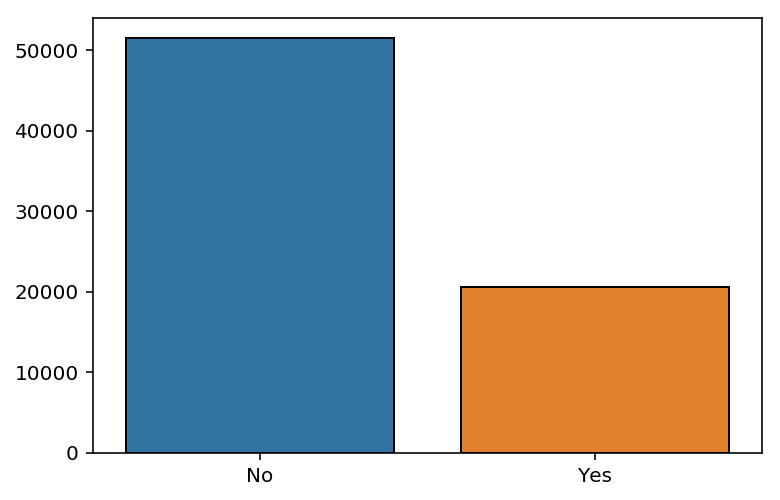

In [61]:
groups = df.groupby(['NoShow'])
gps = groups.size()
ax = sns.barplot(x=gps.index.tolist(), y=gps.values)
plt.show()